#**Montar Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Importar Biblioteca**

In [2]:
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pandas import read_csv
from sklearn.metrics import classification_report, confusion_matrix 
%pylab inline
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Importar base de dados
uri = '/content/drive/Shareddrives/Colab_Grupo2/Colab/Data/dataFrameSelecionado.csv'

#Transformar em dataset e guardar em uma váriavel
data = pd.read_csv(uri)

#**Amostragem dos dados**

In [4]:
# Divide as colunas em variaveis X e y
X = data.drop('follow_up_days', axis=1).copy()
y = data[['follow_up_days']].copy()
# Definindo o tamanho das amostras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#**Criar modelo Arvore de decisão sem hiperparâmetros**


In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#**Avaliando o modelo sem hiperparâmetros**


In [6]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6042713567839196


In [7]:
#Avaliando sem o uso de hiperparâmetros
print('Classification metrics: \n', classification_report(y_test, y_pred))

#Medindo a taxa de erro do modelo

mse = metrics.mean_squared_error(y_test, y_pred)

print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.60      0.49      0.54       225
           1       0.61      0.65      0.63       327
           2       0.60      0.65      0.62       244

    accuracy                           0.60       796
   macro avg       0.60      0.60      0.60       796
weighted avg       0.60      0.60      0.60       796

MSE (Mean-Squared-Error): 0.6331658291457286


#**Criando o modelo com o hiperparâmetros 'profundidade da árvore'**


In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#**Avaliando o modelo com o hiperparâmetros 'profundidade da árvore'**


Accuracy: 0.6268844221105527
MSE (Mean-Squared-Error): 0.5992462311557789
Accuracy: 0.6268844221105527


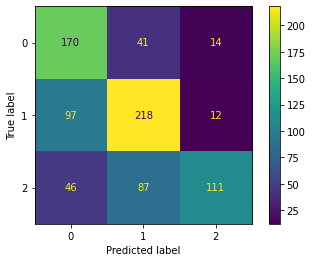

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

mse = metrics.mean_squared_error(y_test, y_pred)
acu = metrics.accuracy_score(y_test, y_pred) 

print('MSE (Mean-Squared-Error): %s' %mse)
print('Accuracy: %s' %acu)

#Medir a taxa de erro e a acurácia do modelo

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


#**Plotando o modelo com o hiperparâmetros 'profundidade da árvore'**


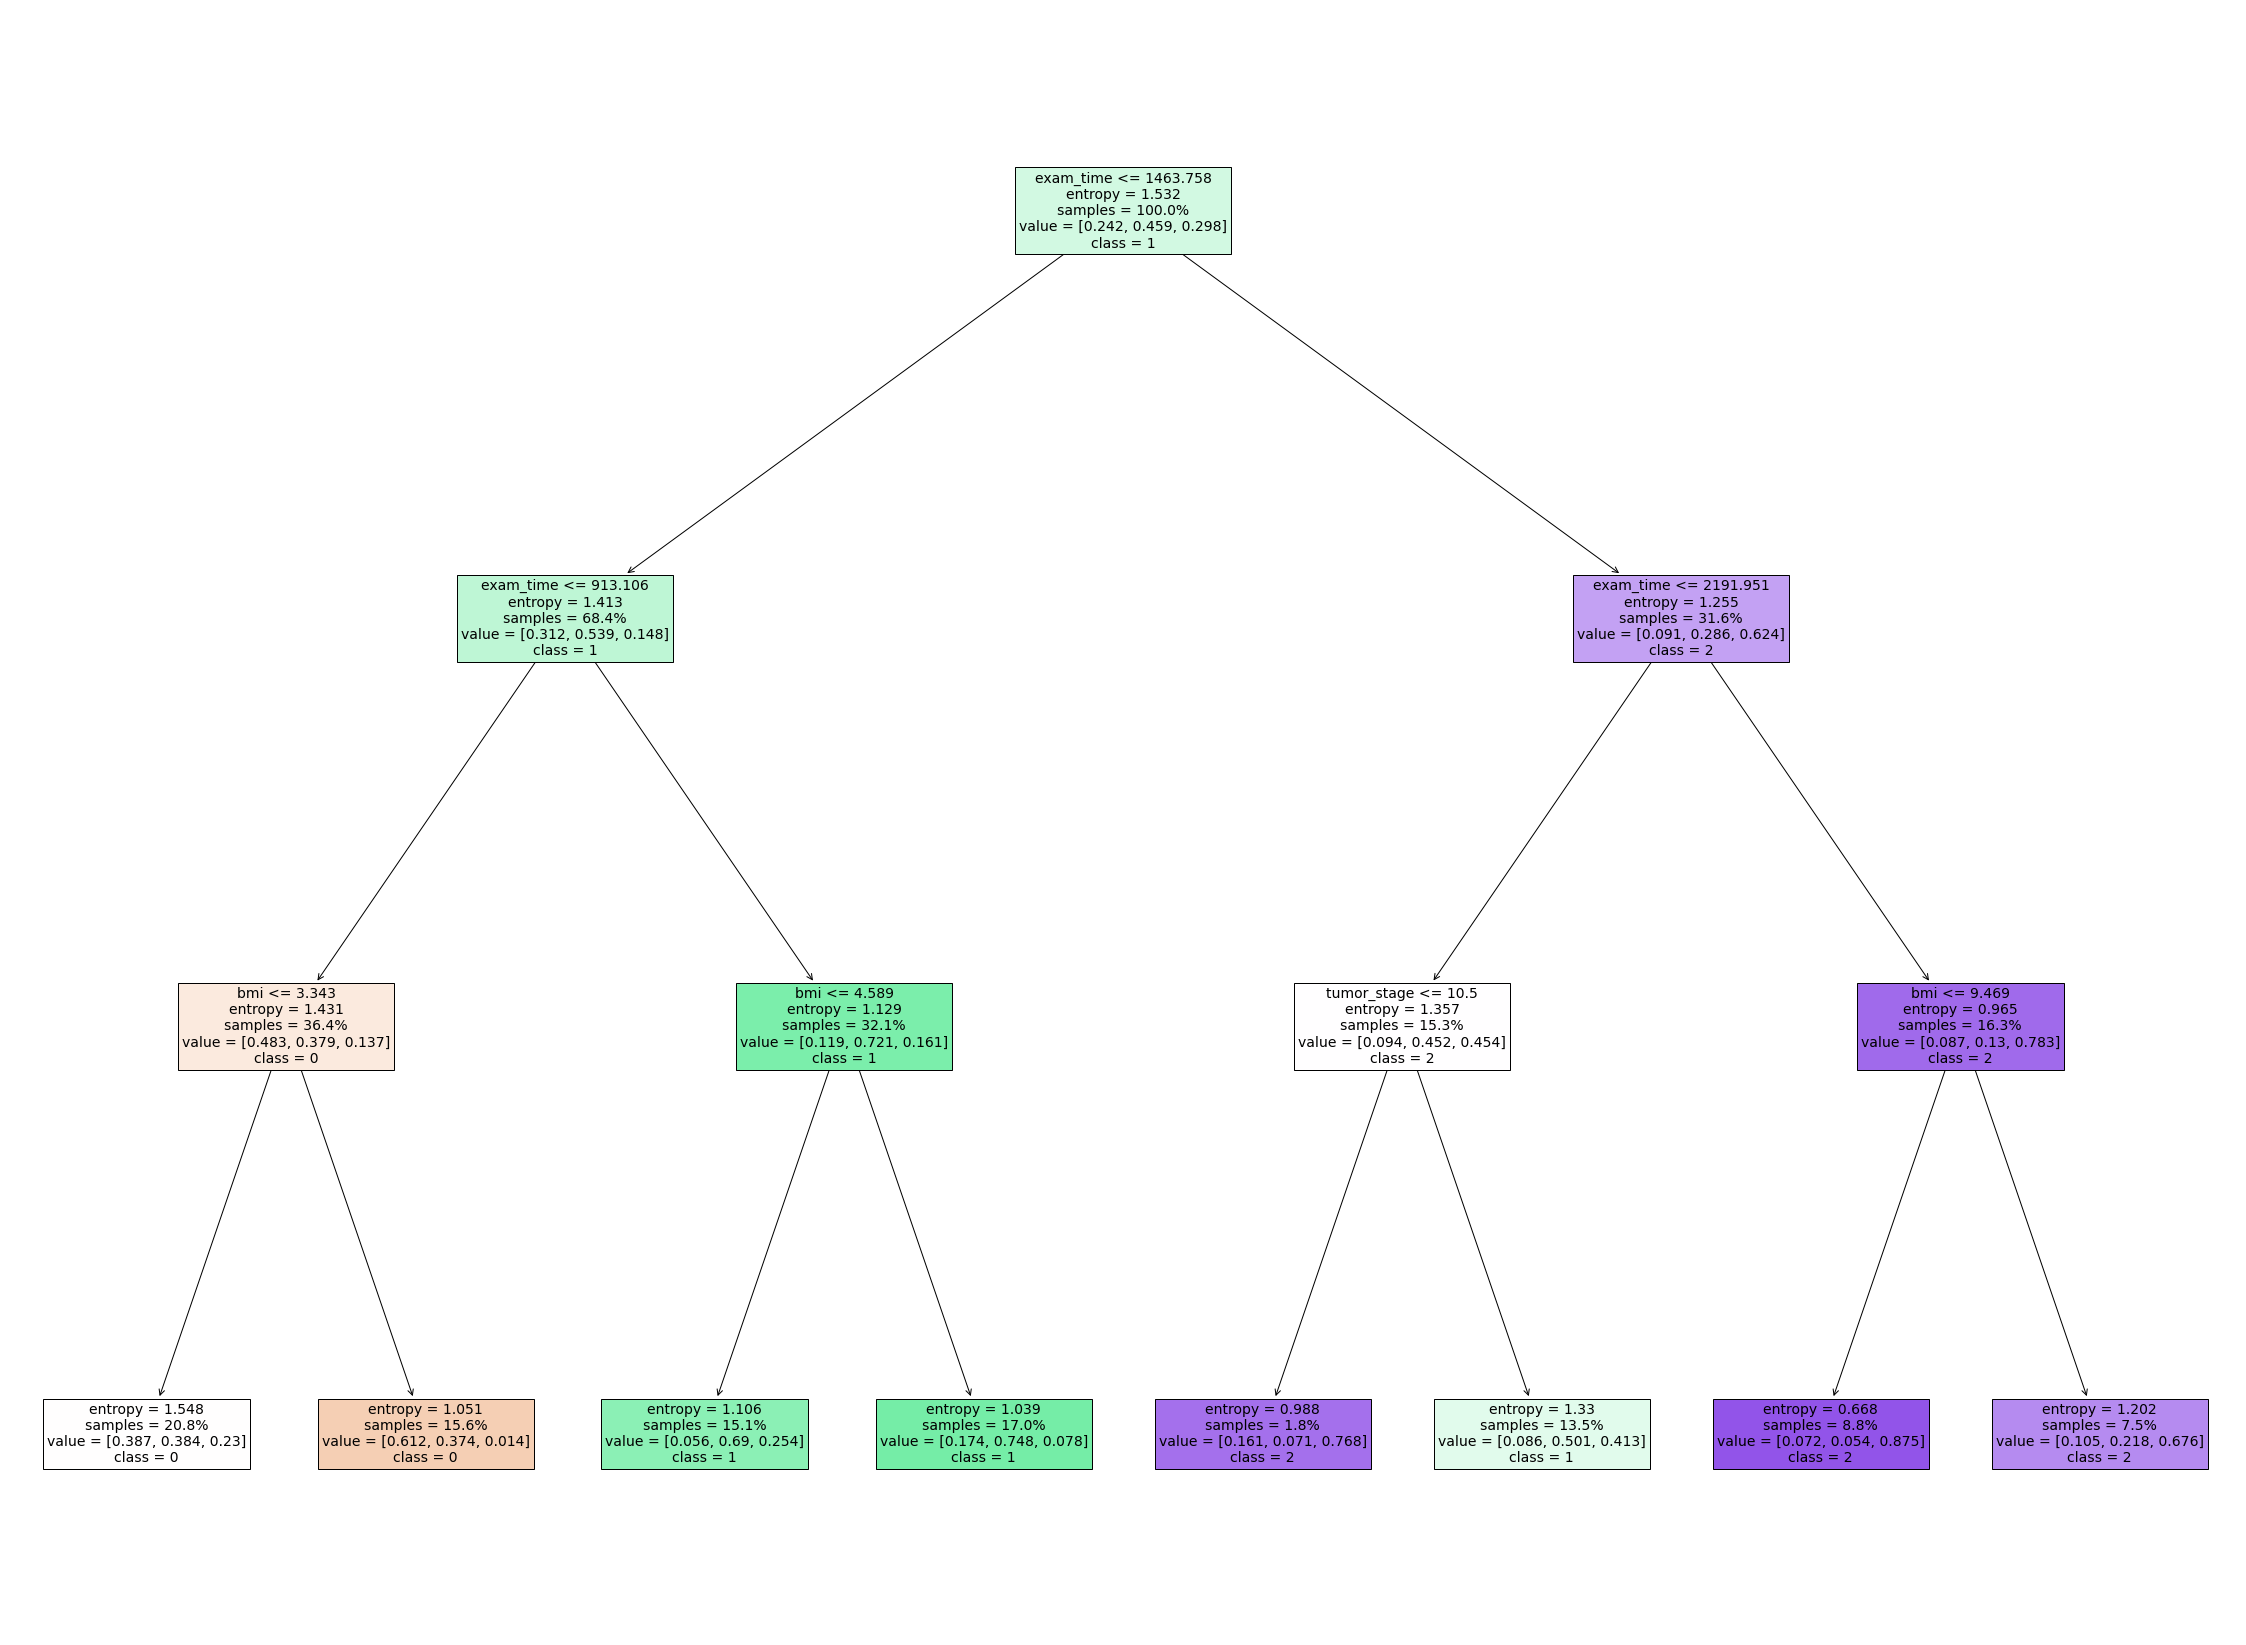

In [10]:
pylab.figure(figsize=(40, 30))
tree.plot_tree(clf,
               feature_names = X_train.columns, 
               class_names=['0', '1', '2', '3'],
               filled = True,
               proportion=True,
               max_depth= 10,
               fontsize=14,
               );
plt.savefig("decision_tree.png")

#Plotar árvore de decisão e salvar como imagem

#**Criar modelo com o método GridSearch para definir os melhores hiperparâmetros**

In [11]:
grid_search_cv = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 37),
                              param_grid = {
                                  'max_depth':range(1,50)
                              }, # Testando comprimentos máximos de 1 a 50
                              scoring='f1_macro', cv = 3)

# Realizando a otimização por GridSearch para os dados de cancer de mama:
grid_search_cv.fit(X,y)
#Vamos ver informações relevantes:
print('Melhor comprimento máximo: {}'.format(grid_search_cv.best_params_['max_depth']))
print('Desempenho AUC-ROC do melhor modelo: {}'.format(round(grid_search_cv.best_score_,3)))
print('Tempo para realizar a otimização:')
%timeit -n 1 -r 1 grid_search_cv.fit(X,y)

Melhor comprimento máximo: 10
Desempenho AUC-ROC do melhor modelo: 0.589
Tempo para realizar a otimização:
3.77 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
y_pred = grid_search_cv.predict(X_test)


#**Avaliando o modelo com hiperparâmetros**

In [13]:
#Avaliando com o uso de hiperparâmetros
print('Classification metrics: \n', classification_report(y_test, y_pred))

#Medindo a taxa de erro do modelo

mse = metrics.mean_squared_error(y_test, y_pred)

print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.90      0.66      0.76       225
           1       0.75      0.92      0.83       327
           2       0.85      0.80      0.82       244

    accuracy                           0.81       796
   macro avg       0.83      0.79      0.80       796
weighted avg       0.82      0.81      0.81       796

MSE (Mean-Squared-Error): 0.2851758793969849


#**Peso das features para o modelo**


In [ ]:
#Calcular o tempo em que o código para descobrir as features mais importantes.
start_time = time.time()
#Define quais são as features mais importantes
importances = crf.feature_importances_
std = np.std([tree.feature_importances_ for tree in crf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")